In [2]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
dfZillowData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 


/Users/cmirwin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
#Show headers and first 10 records of the data set 
#dfZillowData.head(10)
#dfZillowData.info()



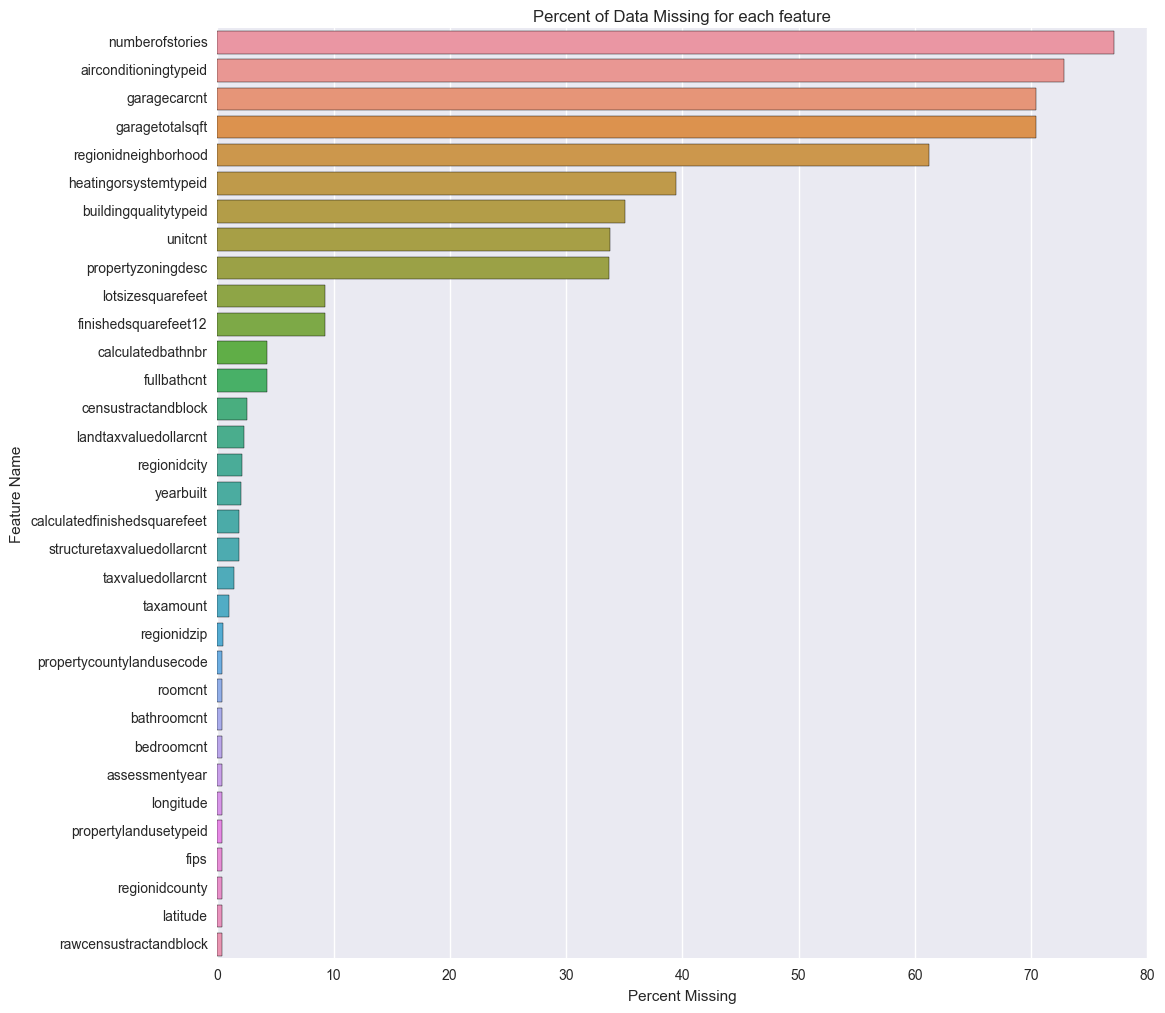

In [3]:
#Look to see if there are any missing values in data frame
dfZillowData.isnull().values.any()

#Find all columns with missing data 
dfMissingZillowData = (dfZillowData.isnull().sum() / len(dfZillowData)) * 100

#Delete from dataframe with values of 0
dfMissingZillowData = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData == 0].index).sort_values(ascending=False)

#Create new dataframe any values greater than 80%
dfMajorityOfDataMissing = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData < 80].index).sort_values(ascending=False)

#Create new dataframe with total missing less than 80%
dfMissingZillowData = dfMissingZillowData.drop(dfMissingZillowData[dfMissingZillowData > 80].index).sort_values(ascending=False)


#Create Graph that shows the missing data
#Set Color palette to standard
color = sb.color_palette()

#set up Figure size
f, ax = plt.subplots(figsize=(12, 12))

#Rotate lables
plt.xticks(rotation='0')

#Add Bar Plots
sb.barplot(y=dfMissingZillowData.index, x=dfMissingZillowData)

#Add Titles to Graph
ax.set(title='Percent of Data Missing for each feature', xlabel='Percent Missing', ylabel = 'Feature Name')

In [4]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2']].where(dfZillowData[['hashottuborspa','pooltypeid2']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)


In [5]:
#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan) 

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt','garagecarcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))


#Set Column Name
dfColumns.columns = ['updatevalue']


#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Look at results. 
dfForModel.describe()


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,hasbasement,hasdeck,hasfireplace,haspatio
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2985217.0,...,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,1.332586e+07,4.165750e+00,7.000411e+00,3.527804e-01,2.200661e+00,3.077101e+00,3.998841e+00,6.210886e+00,2.286339e+00,66.0,...,4.188485e+05,2.014999e+03,2.505395e+05,5.363100e+03,1.399796e+01,6.048158e+13,5.453540e-04,8.867027e-04,1.729523e-03,2.691764e-02
std,7.909966e+06,2.135222e+00,1.101467e-01,1.965456e+01,1.084325e+00,1.287645e+00,3.716363e-02,1.566111e+00,9.807784e-01,0.0,...,7.212790e+05,3.676099e-02,4.401196e+05,9.136004e+03,3.552654e-01,3.212398e+11,2.334645e-02,2.976435e-02,4.155156e-02,1.618428e-01
min,1.071172e+07,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,66.0,...,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.164371e+07,5.000000e+00,7.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,66.0,...,1.817350e+05,2.015000e+03,7.710000e+04,2.478050e+03,1.400000e+01,6.037401e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.254509e+07,5.000000e+00,7.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00,2.000000e+00,66.0,...,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,1.400000e+01,6.037572e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.409712e+07,5.000000e+00,7.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00,3.000000e+00,66.0,...,4.840000e+05,2.015000e+03,3.022000e+05,6.166200e+03,1.400000e+01,6.059042e+13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.696019e+08,1.300000e+01,2.700000e+01,8.516000e+03,2.000000e+01,2.000000e+01,5.000000e+00,1.200000e+01,2.000000e+01,66.0,...,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,9.900000e+01,4.830301e+14,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))

#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Delete from model 
#dfForModel.drop(['heatingorsystemtypeid'], inplace=True, axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#As you can see we have gone from 58 columns in the original data set to 244 now with 
#the creation of Dummy variables and binary variables
dfForModel.describe()


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,LandUseTypeId_260.0,LandUseTypeId_261.0,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_270.0,LandUseTypeId_275.0
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2985217.0,...,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,1.332586e+07,4.165750e+00,7.000411e+00,3.527804e-01,2.200661e+00,3.077101e+00,3.998841e+00,6.210886e+00,2.286339e+00,66.0,...,9.225460e-04,7.234982e-01,1.957580e-02,6.833674e-05,3.155884e-03,1.611498e-01,6.086660e-04,2.059113e-02,1.205942e-05,4.023158e-04
std,7.909966e+06,2.135222e+00,1.101467e-01,1.965456e+01,1.084325e+00,1.287645e+00,3.716363e-02,1.566111e+00,9.807784e-01,0.0,...,3.035943e-02,4.472680e-01,1.385373e-01,8.266323e-03,5.608855e-02,3.676691e-01,2.466365e-02,1.420111e-01,3.472648e-03,2.005378e-02
min,1.071172e+07,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,66.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.164371e+07,5.000000e+00,7.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,66.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.254509e+07,5.000000e+00,7.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00,2.000000e+00,66.0,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.409712e+07,5.000000e+00,7.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,7.000000e+00,3.000000e+00,66.0,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.696019e+08,1.300000e+01,2.700000e+01,8.516000e+03,2.000000e+01,2.000000e+01,5.000000e+00,1.200000e+01,2.000000e+01,66.0,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


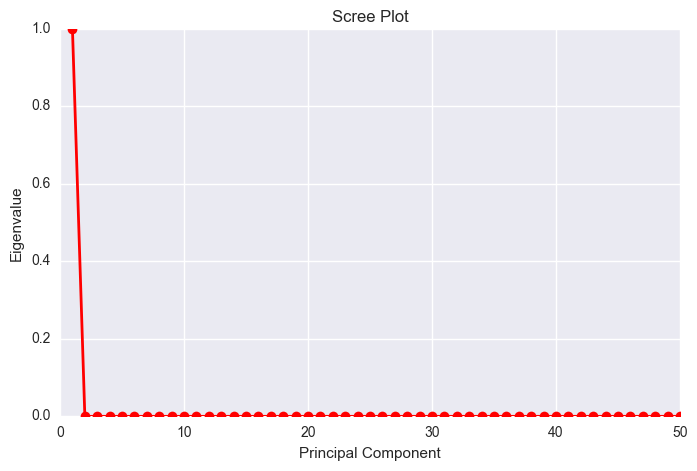

In [7]:
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64'])
    
#Create Object only Datafram
dfZillowDataCat = dfDataTypes.select_dtypes(['object'])


#Complete PCA to help with eliminating variables 
#Using only numeric Data
ZillowDataPCA = dfZillowDataNumeric

components = 50

pca = PCA( n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowDataPCA).transform(ZillowDataPCA) # fit data and then transform it

EigenValues = pca.explained_variance_ratio_

#Run PCA
#ZillowDataPCA_pca = pca.fit(ZillowDataPCA).transform(ZillowDataPCA) # fit data and then transform it

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, EigenValues, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

#print(pca.components_)

#pca.components_.head()

# Using custom Function from Dr Parson's Unit 3 diminsion reduction example
# this function definition just formats the weights into readable strings
# Updated the Function to have 8 decimal points instead of the 2 from the original
#def get_feature_names_from_weights(weights, names):
#    tmp_array = []
#    for comp in weights:
#        tmp_string = ''
#        for fidx,f in enumerate(names):
#            if fidx>0 and comp[fidx]>=0:
#                tmp_string+='+'
#            tmp_string += '%.8f*%s ' % (comp[fidx],f[:-11])
#        tmp_array.append(tmp_string)
#    return tmp_array
  
#pca_weight_strings = get_feature_names_from_weights(pca.components_, dfZillowDataNumeric.columns.values) 

#print(pca_weight_strings)

# create some pandas dataframes from the transformed outputs
#df_pca = pd.DataFrame(ZillowDataPCA_pca,columns=[pca_weight_strings])

#output data to a csv file for additional review.
#We dont want to do this as it creates a CSV that is almost 3 million records :-()
#df_pca.to_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/out.csv', sep=',')
